# Ejemplo de uso: Matplotlib a Vega-Lite

Este notebook demuestra cómo utilizar el paquete `mpl2vega` para convertir gráficos de Matplotlib a especificaciones Vega-Lite.

In [1]:
!pip install -r ../requirements.txt

In [2]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import pandas as pd
import sys

# Añadir la ruta del proyecto al path de Python
import sys
sys.path.append('/Users/nacho/Desktop/mpl2vega-lite')

# Importar los módulos del conversor
from src.converter import mpl_to_vega, save_vega_spec
from src.plot_detection import detect_plot_type

## 1. Gráfico de Dispersión

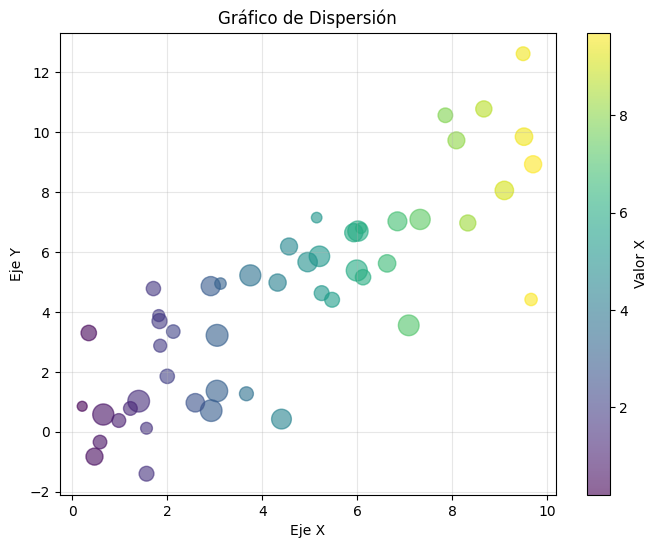

Tipo de gráfico detectado: scatter
Tipo de gráfico detectado: scatter


alt.Chart(...)

In [3]:
# Crear un gráfico de dispersión en Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Generar datos
np.random.seed(42)
x = np.random.rand(50) * 10
y = x + np.random.randn(50) * 2
sizes = np.random.rand(50) * 200 + 50

# Crear el gráfico de dispersión
scatter = ax.scatter(x, y, s=sizes, alpha=0.6, c=x, cmap='viridis')

ax.set_title('Gráfico de Dispersión')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax, label='Valor X')
plt.show()

# Detectar el tipo de gráfico
plot_type = detect_plot_type(ax)
print(f"Tipo de gráfico detectado: {plot_type}")

# Convertir a Vega-Lite
vega_scatter = mpl_to_vega(fig, ax, verbose=True)

# Mostrar el gráfico de Vega-Lite
vega_scatter

In [14]:
vega_scatter.to_dict()

{'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}},
 'data': {'name': 'data-80aa62fc8f5d39234dad17553a6759ef'},
 'mark': {'type': 'circle'},
 'encoding': {'color': {'field': 'label', 'type': 'nominal'},
  'size': {'field': 'size', 'type': 'quantitative'},
  'x': {'field': 'x', 'title': 'Eje X', 'type': 'quantitative'},
  'y': {'field': 'y', 'title': 'Eje Y', 'type': 'quantitative'}},
 'height': 300,
 'title': 'Gráfico de Dispersión',
 'width': 400,
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.20.1.json',
 'datasets': {'data-80aa62fc8f5d39234dad17553a6759ef': [{'x': 3.745401188473625,
    'y': 5.222334348464446,
    'size': 228.51179969799554,
    'label': '_child0'},
   {'x': 9.50714306409916,
    'y': 9.849879626479101,
    'size': 157.86844838313016,
    'label': '_child0'},
   {'x': 7.319939418114051,
    'y': 7.08864285333757,
    'size': 211.4880310328125,
    'label': '_child0'},
   {'x': 5.986584841970366,
    'y': 5.3843774507917885,
    'size': 2

## 2. Gráfico de Líneas

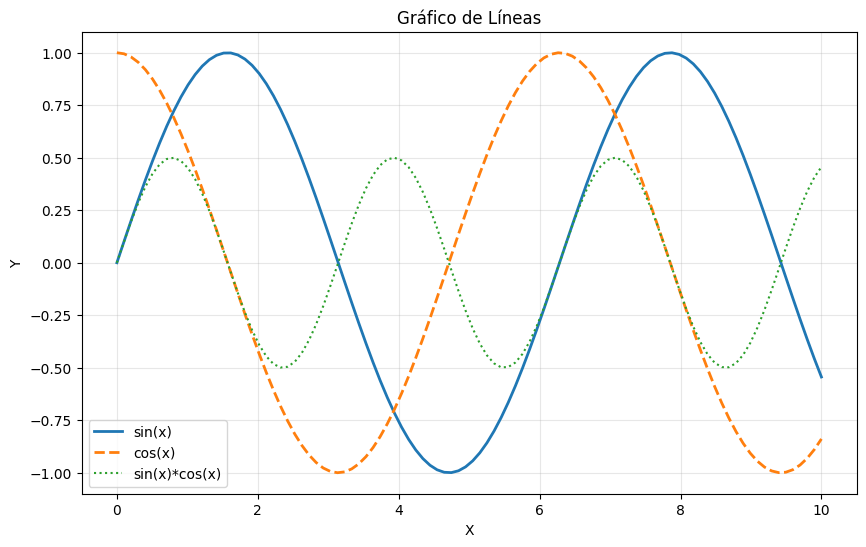

Tipo de gráfico detectado: line
Tipo de gráfico detectado: line


alt.Chart(...)

In [4]:
# Crear un gráfico de líneas en Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Generar datos
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# Crear el gráfico de líneas
ax.plot(x, y1, label='sin(x)', linewidth=2)
ax.plot(x, y2, label='cos(x)', linewidth=2, linestyle='--')
ax.plot(x, y3, label='sin(x)*cos(x)', linewidth=1.5, linestyle=':')

ax.set_title('Gráfico de Líneas')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, alpha=0.3)
ax.legend()

plt.show()

# Detectar el tipo de gráfico
plot_type = detect_plot_type(ax)
print(f"Tipo de gráfico detectado: {plot_type}")

# Convertir a Vega-Lite
vega_line = mpl_to_vega(fig, ax, verbose=True)

# Mostrar el gráfico de Vega-Lite
vega_line

## 3. Gráfico de Barras

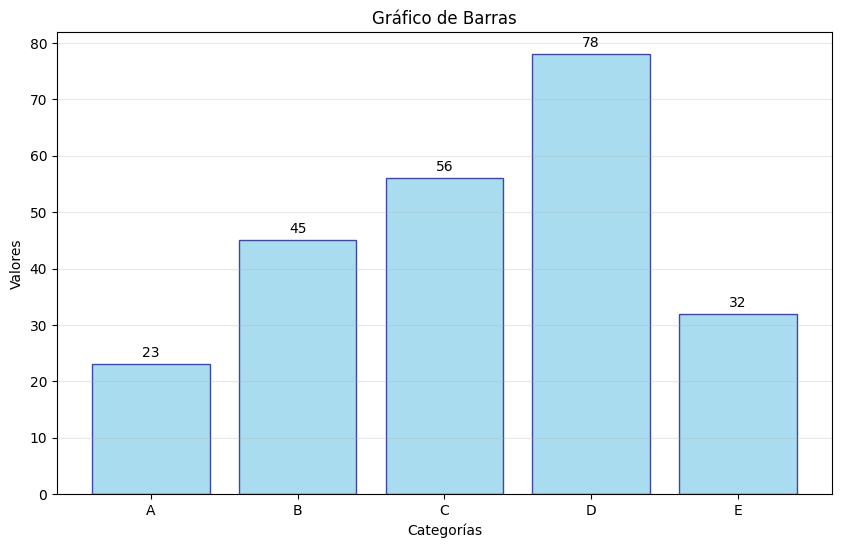

Tipo de gráfico detectado: bar
Tipo de gráfico detectado: bar


alt.Chart(...)

In [5]:
# Crear un gráfico de barras en Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Datos de ejemplo
categorias = ['A', 'B', 'C', 'D', 'E']
valores = [23, 45, 56, 78, 32]

# Crear el gráfico de barras
bars = ax.bar(categorias, valores, color='skyblue', edgecolor='navy', alpha=0.7)

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('Gráfico de Barras')
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.grid(True, alpha=0.3, axis='y')

plt.show()

# Detectar el tipo de gráfico
plot_type = detect_plot_type(ax)
print(f"Tipo de gráfico detectado: {plot_type}")

# Convertir a Vega-Lite
vega_bar = mpl_to_vega(fig, ax, verbose=True)

# Mostrar el gráfico de Vega-Lite
vega_bar

## 4. Histograma

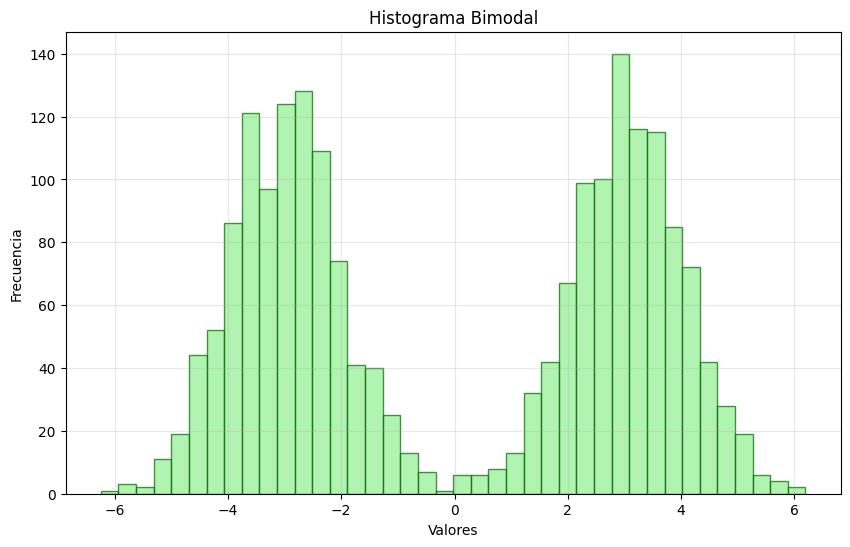

Tipo de gráfico detectado: histogram
Tipo de gráfico detectado: histogram


alt.Chart(...)

In [23]:
# Crear un histograma en Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Generar datos con distribución bimodal
np.random.seed(42)
data1 = np.random.normal(-3, 1, 1000)
data2 = np.random.normal(3, 1, 1000)
combined_data = np.concatenate([data1, data2])

# Crear histograma
hist = ax.hist(combined_data, bins=40, alpha=0.7, color='lightgreen', edgecolor='darkgreen')

ax.set_title('Histograma Bimodal')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')
ax.grid(True, alpha=0.3)

# Añadir líneas verticales en las medias
# ax.axvline(x=-3, color='red', linestyle='--', alpha=0.5, label='Media Grupo 1')
# ax.axvline(x=3, color='blue', linestyle='--', alpha=0.5, label='Media Grupo 2')
# ax.legend()

plt.show()

# Detectar el tipo de gráfico
plot_type = detect_plot_type(ax)
print(f"Tipo de gráfico detectado: {plot_type}")

# Convertir a Vega-Lite
vega_hist = mpl_to_vega(fig, ax, verbose=True)

# Mostrar el gráfico de Vega-Lite
vega_hist

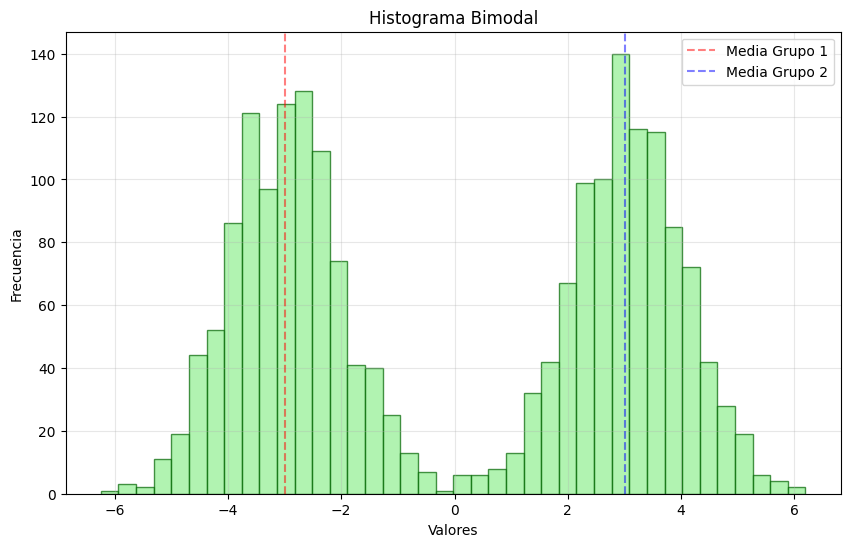

Tipo de gráfico detectado: line
Tipo de gráfico detectado: line


alt.Chart(...)

In [24]:
# Crear un histograma en Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Generar datos con distribución bimodal
np.random.seed(42)
data1 = np.random.normal(-3, 1, 1000)
data2 = np.random.normal(3, 1, 1000)
combined_data = np.concatenate([data1, data2])

# Crear histograma
hist = ax.hist(
    combined_data, bins=40, alpha=0.7, color="lightgreen", edgecolor="darkgreen"
)

ax.set_title("Histograma Bimodal")
ax.set_xlabel("Valores")
ax.set_ylabel("Frecuencia")
ax.grid(True, alpha=0.3)

# Añadir líneas verticales en las medias ! NO SOPORTADO
ax.axvline(x=-3, color='red', linestyle='--', alpha=0.5, label='Media Grupo 1')
ax.axvline(x=3, color='blue', linestyle='--', alpha=0.5, label='Media Grupo 2')
ax.legend()

plt.show()

# Detectar el tipo de gráfico
plot_type = detect_plot_type(ax)
print(f"Tipo de gráfico detectado: {plot_type}")

# Convertir a Vega-Lite
vega_hist = mpl_to_vega(fig, ax, verbose=True)

# Mostrar el gráfico de Vega-Lite
vega_hist

## 5. Guardar las especificaciones Vega-Lite

In [25]:
# Crear una carpeta para guardar las especificaciones
import os
if not os.path.exists('vega_specs'):
    os.makedirs('vega_specs')

# Guardar cada gráfico como JSON y HTML
save_vega_spec(vega_scatter, 'vega_specs/scatter_plot.json')
save_vega_spec(vega_scatter, 'vega_specs/scatter_plot.html', format='html')

save_vega_spec(vega_line, 'vega_specs/line_plot.json')
save_vega_spec(vega_line, 'vega_specs/line_plot.html', format='html')

save_vega_spec(vega_bar, 'vega_specs/bar_plot.json')
save_vega_spec(vega_bar, 'vega_specs/bar_plot.html', format='html')

save_vega_spec(vega_hist, 'vega_specs/histogram.json')
save_vega_spec(vega_hist, 'vega_specs/histogram.html', format='html')

print("Especificaciones guardadas en la carpeta 'vega_specs/'")

Especificaciones guardadas en la carpeta 'vega_specs/'


## 6. Visualización en Vega-Lite Editor

Puedes copiar cualquiera de las especificaciones JSON generadas y pegarlas en el [Editor de Vega-Lite](https://vega.github.io/editor/) para visualizarlas y modificarlas.

```python
# Para ver el contenido de una especificación:
import json
with open('vega_specs/histogram.json', 'r') as f:
    print(json.dumps(json.load(f), indent=2))
```

## 7. Conversión a Hechos ASP con Draco2

Esta sección demuestra cómo convertir las especificaciones Vega-Lite generadas a hechos ASP (Answer Set Programming) utilizando la biblioteca Draco2. Esto es útil para análisis, optimizaciones y transformaciones de visualizaciones basadas en ASP.

In [26]:
# Verificar si podemos importar Draco
import draco
from draco.fact_utils import dict_to_facts

In [27]:
from pprint import pprint

In [28]:
# Convertir cada uno de nuestros esquemas a hechos ASP
print("\n1. Gráfico de Dispersión a ASP Facts\n")
asp_scatter = dict_to_facts(vega_scatter.to_dict())

print("\n2. Gráfico de Líneas a ASP Facts\n")
asp_line = dict_to_facts(vega_line.to_dict())

print("\n3. Gráfico de Barras a ASP Facts\n")
asp_bar = dict_to_facts(vega_bar.to_dict())

print("\n4. Histograma a ASP Facts\n")
asp_hist = dict_to_facts(vega_hist.to_dict())


1. Gráfico de Dispersión a ASP Facts


2. Gráfico de Líneas a ASP Facts


3. Gráfico de Barras a ASP Facts


4. Histograma a ASP Facts



In [29]:
# Función para guardar los hechos ASP en archivos
def save_asp_facts(facts, filename):
    """Guarda una lista de hechos ASP en un archivo"""
    with open(filename, 'w') as f:
        for fact in facts:
            f.write(fact + "\n")
    print(f"Hechos ASP guardados en '{filename}'")

# Crear carpeta para los hechos ASP si no existe
if not os.path.exists('asp_facts'):
    os.makedirs('asp_facts')

# Guardar los hechos ASP
save_asp_facts(asp_scatter, 'asp_facts/scatter_plot.lp')
save_asp_facts(asp_line, 'asp_facts/line_plot.lp')
save_asp_facts(asp_bar, 'asp_facts/bar_plot.lp')
save_asp_facts(asp_hist, 'asp_facts/histogram.lp')

Hechos ASP guardados en 'asp_facts/scatter_plot.lp'
Hechos ASP guardados en 'asp_facts/line_plot.lp'
Hechos ASP guardados en 'asp_facts/bar_plot.lp'
Hechos ASP guardados en 'asp_facts/histogram.lp'


In [30]:
# Mostrar los hechos ASP generados
print("\nHechos ASP generados para el gráfico de dispersión:")
for fact in asp_scatter:
    print(fact)
print("\nHechos ASP generados para el gráfico de líneas:")
for fact in asp_line:
    print(fact)
print("\nHechos ASP generados para el gráfico de barras:")
for fact in asp_bar:
    print(fact)
print("\nHechos ASP generados para el histograma:")



Hechos ASP generados para el gráfico de dispersión:
attribute((config,view,continuousWidth),root,300).
attribute((config,view,continuousHeight),root,300).
attribute((data,name),root,data-80aa62fc8f5d39234dad17553a6759ef).
attribute((mark,type),root,circle).
attribute((encoding,color,field),root,label).
attribute((encoding,color,type),root,nominal).
attribute((encoding,size,field),root,size).
attribute((encoding,size,type),root,quantitative).
attribute((encoding,x,field),root,x).
attribute((encoding,x,title),root,eje X).
attribute((encoding,x,type),root,quantitative).
attribute((encoding,y,field),root,y).
attribute((encoding,y,title),root,eje Y).
attribute((encoding,y,type),root,quantitative).
attribute(height,root,300).
attribute(title,root,gráfico de Dispersión).
attribute(width,root,400).
attribute($schema,root,https://vega.github.io/schema/vega-lite/v5.20.1.json).
entity(data-80aa62fc8f5d39234dad17553a6759ef,root,0).
attribute((data-80aa62fc8f5d39234dad17553a6759ef,x),0,3.745401188